# Lab 05 Prelab

## Ohm's Law, Plots, and Models

Ohm's law relates the electrical potential applied across a device ($V$) to the current that passes through it, $I$.
Like Hooke's law, Ohm's law isn't really a physical law, rather it is an empirical relation that does a good job of describing many devices or materials under specific ranges of circumstances. Ohm's law takes the form:

$$
V = IR.
$$

An example related to this lab is as follows. Consider the circuit below, where we have a voltage source (battery) with an adjustable voltage $V.$ The battery is connected to a resistor of unknown, but fixed resistance $R$. We have access to tools to measure the voltage $V$ (using a voltmeter) across the resistor as well as the current $I$ (using an ammeter) in the circuit. Knowing that we can vary the voltage $V$, how can we go about extracting the resistance $R$?

<center><img src="circuit.png" width="180" height="240"/></center>

Given multiple datapoints $(V_1 \pm u\_V_1, I_1 \pm u\_I_1)$, $(V_2 \pm u\_V_2, I_2 \pm u\_I_2)$, $\ldots (V_n \pm u\_V_n, I_n \pm u\_I_n)$, a useful way to visualize the relationship (and extract information from the relationship) is by plotting the two variables against each other. We have done so below for a mock dataset of voltages and currents. It is worth noting that this issue is one of great general interest in science. We may have two variables which are related---in this case the current $I$ through the resistor as a result of the voltage of the potential across the resistor $V_R$) and a model that describes how they may be related (here, Ohm's law). What we can do as experimental scientists is to collect data of the two variables and try to fit a model to them; from this we may extract parameters of interest (here, the resistance of our circuit), as well as evaluate how good the model is at describing the phenomena we see.

<center><img src="CurrentvsVoltage.png" width="500" height="325"/></center>

**Your turn #1 (short answer questions):** If you get stuck or want to make sure you are on the right track in this question sequence, the answers are provided below.

**Your turn #1a:** What is the relationship between voltage and current as shown in the experimental data above?

**Your turn #1b:** What is the relationship theoretically predicted by Ohm's law? 

**Your turn #1c:** How is the slope of the above plot related to the resistance $R$ of the resistor?

**Your turn #1d:** Finally, estimate the resistance $R$ of the resistor by estimating the slope of the experimental data above.

**Answers (uncollapse to reveal):**

##### **A1a:**

**A1a:** The relationship between current and voltage appears linear.

##### **A1b:**

**A1b:** The relationship predicted by Ohm's law is $I = (1/R)V$, i.e. the two are linearly related via the resistance.

##### **A1c:**

**A1c:** The slope of the above plot is related to the resistance of the resistor via Ohm's law to be $m = 1/R$.

##### **A1d:**

**A1d:** The slope of the above plot looks to be roughly $m = \frac{0.08A - 0A}{0.8V - 0V} = 0.1$, and so the resistance is approximately $R = \frac{1}{m} = 10\Omega$.

## Plotting with Python

An important first step to finding relationships between variables is data visualization; such as through producing plots of data. Fortunately, python is an excellent medium for this task. The rest of this pre-lab will be walking through how to produce a scatter plot of experimental data and extract useful information, which we will be doing time and time again for future experiments in this lab.

Much like with the case of recording data in tables, plotting is not a native functionality of python; instead, we import a library which carries this functionality. In this case, the library of interest is `matplotlib`. You can import it (along with the data_entry and numpy libraries we have been using) by running the cell below.

In [3]:
# Run me to import the relevant libraries
import data_entry2
import numpy as np
import matplotlib.pyplot as plt

We will go through an example together of creating a scatter plot, and then at the end we will ask you to take what you've learned to recreate the scatter plot we showed in the beginning of the notebook. For our example together, we consider an example akin to the very first experiment in the lab. We suppose that we have some spring, and we have measured the force the spring exerts $F$ for a variety of compressions $\Delta x$. The data are given in the spreadsheet below:

In [ ]:
# Run me to import example data
de1 = data_entry2.sheet("lab05_prelab_hookes_law")

**Your turn #2:** We will want to work with vectors of this data, so click the `Generate Vectors` button in the spreadsheet. 

Next, let's create an initial plot of the datapoints of force vs displacement and nothing else.

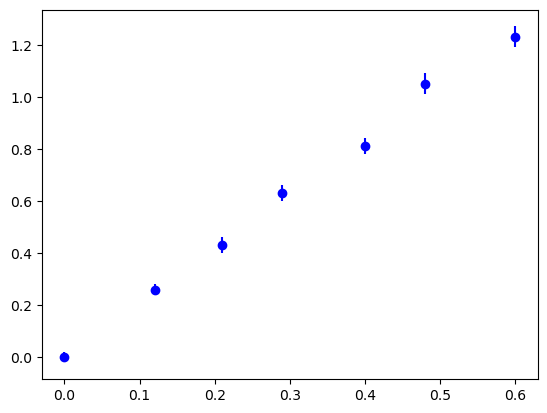

In [4]:
# Run me to create a simple ply of FVec vs dxVec wuth y-uncertainties uFVec
plt.errorbar(dxVec, FVec, uFVec, fmt='bo')
plt.show()

We use `plt` to specify that we want to be using the `matplotlib` plotting library. We then use the `plt.errorbar` function to specify that we want a plot with error bars. The first argument we give it (`dxVec`) provides data for the x-axis, the second argument (`FVec`) provides the data for the y-axis, and the third argument (`uFVec`) provides the error bars for the y-axis data (we will often find that the errors in the y-values are more significant than those on the x-values, so the x errors can often be neglected). The final argument (`fmt='bo'`) specifies that we want blue (`b`) circles (`o`) for the datapoints. Finally, the `plt.show()` at the end displays the plot.

**Your turn #3:** Try replacing the blue dot symbol with a red x symbol using `fmt='rx'` above. 

Let's start adding further important information to our plot, such as axis labels and a title. We will also show how to adjust the size of the markers in the plot and then add a legend (though this plot doesn't really need one).

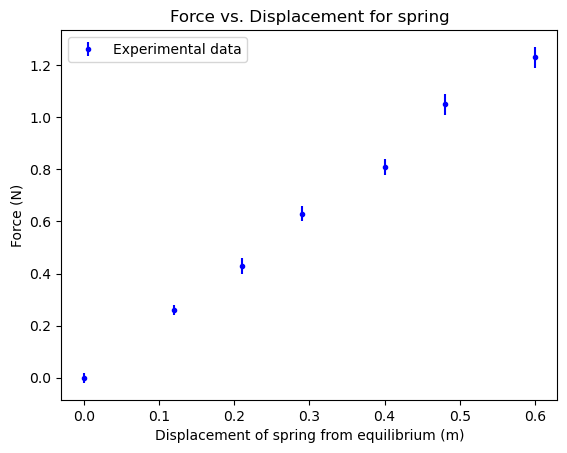

In [5]:
# Run me to reproduce the previous plot and add further detail
plt.errorbar(dxVec, FVec, uFVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

We now have a complete plot! Notice that the plot title describes what is being plotted against what (y quantity plotted vs. x quantity), and the axis labels describe the quantities (with the units). Experiment with what the title and axis labels by changing the text inside `plt.title("..."), plt.xlabel("..."),` and `plt.ylabel("...")`functions in the cell above.

The `markersize = ...` argument in `plt.errorbar` specifies how large the markers in the plot are. In the first version of the plot above, the error bars of the first datapoint were hidden behind the marker so here we shrink the size of the markers to make the small error bars more visible.

Finally, by providing a `label="..."` argument to `plt.errorbar`, we can specify the label for the plot when we include a legend with `plt.legend()`. We don't really need a legend here as we are only plotting a single dataset, but later on when we have multiple things on the same plot, a legend will become very useful.

Note that the plot will (usually) automatically give reasonable axis tick marks (the specific numbers displayed along each axis), and set appropriate limits for the plot so all datapoints are displayed. If you find the defaults aren't suitable, there are ways to control these (eg `plt.xlim([min, max])` and `plt.xticks([.1, .2, .3])`), though you probably won't need those in this course.

**Your turn #4:** Recall that Hooke's law tells us that $F = k \Delta x$. Is the slope of this graph equal to $k$, $1/k$ or some other quantity?

##### Answer

**A:** The slope of the above plot can be identified as the spring constant $k$ of the spring via Hooke's law.

## Adding a model to our graph

We've seen how to plot data. We will often want to add a line or curve to a plot to judge how well a model describes the experimental results. To do this, we break the process into four steps:
1. Find the range of x-values that the data span
2. Generate many x-values over the range of values for which we want to determine the model predictions. Why do we need many points? For a straight line the number of points used doesn't matter much, but if the model predicts a more complicated function, using many points will give a curve that looks smooth to the eye.
3. Calculate the model prediction (model y-values) at each of the x-values
4. Plot the model prediction on the graph.

Here, our model is the linear model of $F = kx$. In order to create our model prediction, we will need a value for the model parameter $k$ (the spring constant of the spring, and the slope of the model). To start with, we can estimate this value by inspection; we have points at approximately $(0\,\textnormal{m}, 0\,\textnormal{N})$ and $(0.6\,\textnormal{m}, 1.2\,\textnormal{N})$, so a reasonable estimate of the slope (which corresponds to $k$) would be $\textnormal{slope} = \frac{1.2N - 0N}{0.6m - 0m} = 2\,\textnormal{N/m}$. 

Let's use this value to add an initial estimate of our model to our graph:

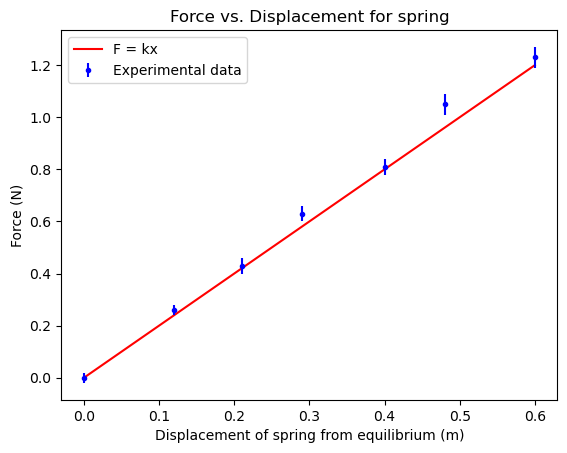

In [6]:
# Run me to plot our model as a straight line and our data points, both on the same graph

# Scatter step 1: find the limits of the data:
xmin = np.min(dxVec) # use the np.min function to find the smallest x-value
xmax = np.max(dxVec) # same for max
# print (xmin, xmax)  # uncomment to see what the limits are

# Scatter step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
# print(xpoints) # uncomment to see the x values that were generated.

# Scatter step 3: calculate the model values:
slope = 2 # Our initial estimate of the slope from above (units: N/m).
ypoints = xpoints * slope # this calculates the model y-values at all 200 points.

# Scatter step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "F = kx")

# Scatter step 5: Add all the previous details from before
plt.errorbar(dxVec, FVec, uFVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

A few things to note:
1. `plt.show()` helps ensure that `plt.plot()`, `plt.errorbar()` and the other `plt.` functions will appear on the same plot
2. The syntax for `plt.plot()` is a little different from `plt.errorbar()`. For `plt.errorbar()` you need `fmt='bo'`, but for `plt.plot()` the format for plotting can't include the `fmt=` piece (annoying, but this is just how it is).

## Residuals - what they area and how to plot them

This fit of the model to our data looks pretty good to the eye, but we are going to introduce a new tool, a residuals plot, which we will use in lab 5 (and future labs) as a tool to help improve the quality of our fits and to estimate uncertainty in the fitting parameters, which in this case is the slope, which is often given the symbol $m$). For now, we will introduce what it is and how to create the plot.

A residual is a measure of how far a data point lies from the best fit line (the model) along the y-direction. So for a given data point on the graph $(x_i, y_i)$, the residual $(R_i)$ is given by:

$$R_i = y_i - \text{model}(x_i)$$

where $\text{model}(x_i)$ represents the $y$-value that our model, $y = mx$, predicts at the point $x_i$. Let’s build a graph of the residuals that correspond to each $x$-value and then we will spend a bit more time learning about how they are useful. We will break this process down into a few steps:

1. Calculate the model prediction $\text{model}(x_i)$ points at all of the $x$-data values
2. Calculate the residual vector $[R_1, R_2, \ldots R_n]$ as the difference of the $y$-data vector $[y_1, y_2, \ldots, y_n]$ and the model vector $[\text{model}(x_1), \text{model}(x_2), \ldots, \text{model}(x_n)]$. 
3. Plot the residual vector against the $x$-data vector.
4. Add a $R = 0$ x-axis to the plot.

Let's create the residuals plot for our current model of the Hooke's law dataset.

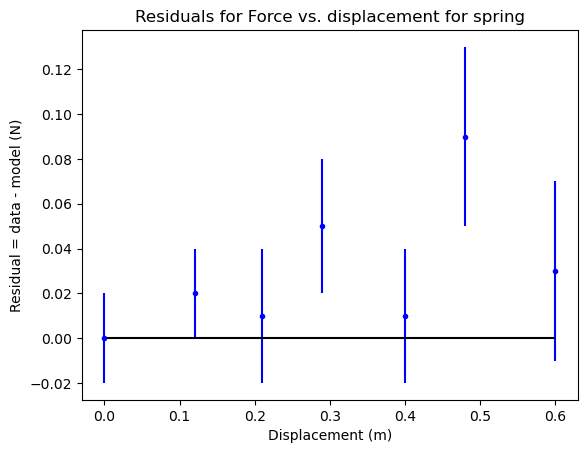

In [7]:
# Run me to calculate residuals and create a well-labelled residuals plot

# Residuals step 1: Calculate the model prediction for each our data points from dxVec
ymodel = slope * dxVec # y = mx at each x_i

# Residuals step 2: Calcualte the residuals vector
RVec = FVec - ymodel

# Residuals step 3: Plot the residuals vector against the x-data vector
plt.errorbar(dxVec, RVec, uFVec, fmt="bo", markersize = 3)

# Residuals step 4: Add a horizontal line at R=0 to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw a black axis at y = 0.

# Residuals step 5: Add axis labels and title, and show the graph
plt.title("Residuals for Force vs. displacement for spring")
plt.xlabel("Displacement (m)")
plt.ylabel("Residual = data - model (N)")
plt.show()

Note that we use use `plt.errorbar()` to plot the residuals, and we use the **same** uncertainties as our $y$-data uncertainties, `ufVec`. This is because there are no uncertainties associated with the model predictions, thus the uncertainties in the residuals (the difference of data and model) are just the uncertainties in the data y-values. We also modify the labelling of the plot (axis labels, title) to make sure what is being plotted is more clear.

Looking at the residuals (difference between model and data) gives us more resolving power than looking our original scatter plot that included the data and model. In this case, we can see from the residuals plot that the residuals trend upward as we go to the right. This suggests that we could improve out model to better fit to the data. In this case, we will want to increase the slope of the model to account for the current upward trend in the residuals. 

Usually, it is standard to plot the data/model and residual plot in the same cell, for ease of viewing. We do this below.

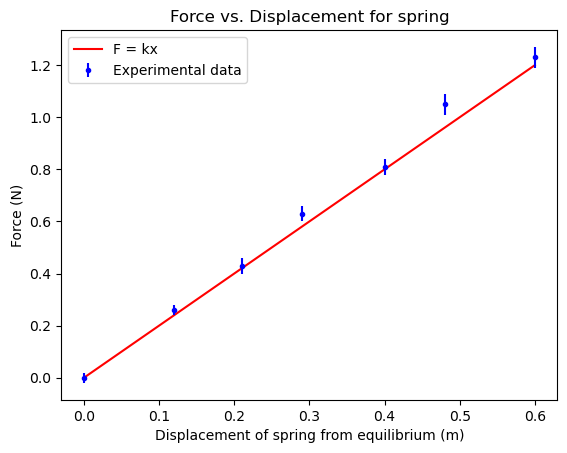

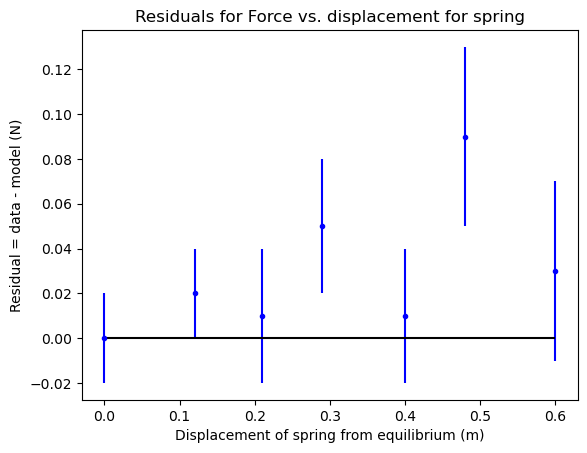

In [8]:
# Run me to make our two plots together (this is all the same code from before)

# Scatter step 1: find the limits of the data:
xmin = np.min(dxVec) # use the np.min function to find the smallest x value
xmax = np.max(dxVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Scatter step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Scatter step 3: calculate the model values:
slope = 2 # Our initial estimate of the slope from above (units: N/m).
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Scatter step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "F = kx")

# Scatter step 5: plot the data:
plt.errorbar(dxVec, FVec, uFVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

# Residuals step 1: Calculate the model at each x-datapoint
ymodel = slope * dxVec # y = mx at each x_i

# Residuals step 2: Calcualte the residual vector
RVec = FVec - ymodel

# Resoduals step 3: Plot the residual vector against the x-data vector
plt.errorbar(dxVec, RVec, uFVec, fmt="bo", markersize = 3)

# Residuals step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Residuals step 5: Add axis labels and title, and show the graph
plt.title("Residuals for Force vs. displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Residual = data - model (N)")
plt.show()

Let’s take a moment to see how these two graphs each present the same overall information, but with different emphases. 

- The main scatter-plot, on top, shows our data points and the model. We can see that, within their uncertainties, all of our data points lie along the model line or above it.
- The residuals plot, on the bottom, shows how far each data point is away from the model, thus we can see a bit more clearly that the left-most data point lies exactly at R = 0 (the model predicts this data point exactly) and all of the other data points have positive residuals (data - model), meaning that model is providing a lower prediction than the actual data. The residuals graph can be thought of as a zoomed-in representation of the data points as seen from the perspective of the model line.

The zoomed-in nature of the residual plot (in comparison to the raw scatterplot and model) allows us to better analyze the agreement between the two. This makes residual plots an extremely useful tool for evaluating the quality of fits and for modifying models, which you are now going to do below. 

**Your turn #5:** Let's see if we can improve the fit of our model to the data. Using the plots directly above, try out slopes of 1.7, 1.8, 1.9, 2.0, 2.1, 2.2 and 2.3 (N/m). Categorize each of the slopes as _best fits_ (fits where it seems like there is little room for improvement), _decent fits_ (reasonable fits where there is still room for small obvious improvements) or _poor fits_ using the list below.

_Hints:_

* For a good fit we are looking to have approximately equal scatter of the residuals above and below the R=0 horizontal line, which would also correspond to an approximately equal scatter of the data points above and below the model on the scatter plot.
* For a good fit, there should be no obvious trends in the residuals. An example of an obvious trend is the small but noticeable upward trend we saw for slope = 2.0.
* Finally, if the uncertainties are well-characterized (neither overestimated or underestimated) and we are using an appropriate model, we will expect that approximately 68% of the residuals will have their error bars touch the horizontal R=0 line.

Categorize the slopes 1.7, 1.8, 1.9, 2.0, 2.1, 2.2 and 2.3 (N/m) here:

* Best fits:
* Decent fits:
* Poor fits:

##### **Answer:**

* Best fits: 2.1
* Decent fits: 2.0, 2.2
* Poor fits: 1.7, 1.8, 1.9, 2.3 

## Plotting with Python - Your turn! 

**Your turn #6:** Now that we've gone through an example together, it is your turn to follow the steps above to create the current vs. voltage plot (including labels and title) that we saw at the beginning of the notebook. The data you need is provided below.

_Hint: Instead of starting from scratch, you can copy the last code cell in the *Plotting with Python* section and modify the names of the vectors being plotted, as well as the axis labels/title to fit the Current vs. Voltage plot._

In [ ]:
# Run me to load the Ohm's Law data
# Make sure to press "Generate Vectors" afterward

de2 = data_entry2.sheet("lab05_prelab_ohms_law")

In [ ]:
# Use this cell to create your scatter plot 


**Your turn #7:** Finally, plot a linear model on top of the current vs. voltage scatterplot in the cell below and add a residuals plot. Adjust the slope until your scatter plot and residuals plot both show a good fit of the model to the data.

_Hints_

* You can use Your turn #1d to get a good initial estimate of the slope $m$ for the model 
* You will likely find it convenient to copy and paste the last code cell in the *Residuals - Making a plot* section and modify the variable names/plot elements accordingly.

In [ ]:
# Use this cell to create your scatter plot with model, and your residuals plot



## Estimating uncertainty of the slope

Now that we have a linear model, we can also estimate the uncertainty of the slope. 

To estimate uncertainties in fitting parameters, we will use the method of looking at the range of reasonable best-fit lines and treating that as a confidence interval. We will make the steepest possible best-fit line "Max" (as in maximum slope) that still does a reasonable job of fitting the data and a least steep "Min" (as in minimum slope) that also does a reasonable job of fitting the data. We will call our original model line "Best". Use the "Best" parameters for the starting guesses for the "Max" and "Min" fit parameters.

To calculate the uncertainty of the slope, the range between the maximum and minimum slope is our 68% confidence interval for the slope, and so the uncertainty is that 68% confidence interval divided by 2.


In the Hooke's Law data set we found in "your turn #5" that the graph has decent fits for slopes in the range 2.0-2.2. So this would be the 68% confidence interval for the slope.

In [ ]:
slope_max = 2.2
slope_min = 2.0
slope_best = 2.1
u_slope = (slope_max-slope_min)/2
print("The model slope is: {:.3f}+/-{:.3f} N/m".format(slope_best, u_slope))

**Your turn #8:** Find the uncertainty of the slope of the Ohm's law data, by adjusting the slope to find the models that correspond to the maximum and minimum slopes that still correspond to reasonable fits.

_Hints_

* To find the maximum slope, increase the slope from your best slope until the model no longer fits the data.

In [ ]:
# Copy and paste your code from the code cell above for #7 where you plotted your model and residual plot
# and adjust your slope variable

In [ ]:
slope_max = 
slope_min = 
slope_best = 
u_slope = (slope_max-slope_min)/2
print("The model slope is: {:.3f}+/-{:.3f} N/m".format(slope_best, u_slope))

##### Answer

In [ ]:
slope_max = 0.111
slope_min = 0.092
slope_best = 0.101
u_slope = (slope_max-slope_min)/2
print("The model slope is: {:.3f}+/-{:.3f} N/m".format(slope_best, u_slope))

Since we are approximating the slope uncertainty, you answer might be slightly different. Your uncertainty should be within 10% of the answer above.

# Submit

Steps for submission:

1. Run the cell below with `%reset -f`, which will clear any stored variables
2. Comment out (put a # before) the line with `%reset -f`
3. Click: Run => Run_All_Cells
4. Read through the notebook to ensure all the cells executed correctly and without error.
5. File => Save_and_Export_Notebook_As->HTML
6. Upload the HTML document to the lab submission assignment on Canvas.

In [ ]:
%reset -f 
# Clear all variables, start with a clean environment.
# comment out this line after you run it before you run all cells